In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#making dataframes for accident data from 2018 and 2023, before reduced maximum speed on highways and after (not a Covid year)

ongevallen_2018 = "C:\\Users\\olede\\Documents\\Python\\Groepje9\\01-01-2018_31-12-2018\\Ongevallengegevens\\ongevallen.txt"
df_ong_2018 = pd.read_csv(ongevallen_2018, delimiter=',', encoding='ISO-8859-1', low_memory=False)

ongevallen_2023 = "C:\\Users\\olede\\Documents\\Python\\Groepje9\\01-01-2023_31-12-2023\\Ongevallengegevens\\ongevallen.txt"
df_ong_2023 = pd.read_csv(ongevallen_2023, delimiter=',', encoding='ISO-8859-1', low_memory=False)

In [ ]:
#dividing the dataframes in two for both years, one filtering for the 35 least urban municipalities and one filtering for the three most urban

rural_df_2018 = df_ong_2018[df_ong_2018['GME_NAAM'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])]

urban_df_2018 = df_ong_2018[df_ong_2018['GME_NAAM'].isin([
    "Leiden", "\'s-Gravenhage", "Haarlem"
])]

rural_df_2023 = df_ong_2023[df_ong_2023['GME_NAAM'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])]

urban_df_2023 = df_ong_2023[df_ong_2023['GME_NAAM'].isin([
    "Leiden", "\'s-Gravenhage", "Haarlem"
])]

In [26]:
#filtering those 4 dataframes for maximum speeds 100 km/h and up, targeting highways 

filtered_df_rural_2018 = rural_df_2018[rural_df_2018['MAXSNELHD'] >= 100]
filtered_df_rural_2023 = rural_df_2023[rural_df_2023['MAXSNELHD'] >= 100]
filtered_df_urban_2018 = urban_df_2018[urban_df_2018['MAXSNELHD'] >= 100]
filtered_df_urban_2023 = urban_df_2023[urban_df_2023['MAXSNELHD'] >= 100]

#printing csv files to check if the right data stayed in the file
filtered_df_rural_2018.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_rural_2018.csv", index=False)
filtered_df_rural_2023.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_rural_2023.csv", index=False)
filtered_df_urban_2018.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_urban_2018.csv", index=False)
filtered_df_urban_2023.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_urban_2023.csv", index=False)

In [ ]:
#adding an area type column to the dataframes, to show the difference in the plot figure
filtered_df_rural_2018['AREA_TYPE'] = "Rural"
filtered_df_rural_2023['AREA_TYPE'] = "Rural"
filtered_df_urban_2018['AREA_TYPE'] = "Urban"
filtered_df_urban_2023['AREA_TYPE'] = "Urban"

#merging all dataframes into one so all data can be shown in one figure
combined_df = pd.concat([filtered_df_rural_2018, filtered_df_rural_2023, filtered_df_urban_2018, filtered_df_urban_2023])

#checking if all data is merged correctly
combined_df.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\combined.csv", index=False)

C:\Users\olede\AppData\Local\Temp\ipykernel_22540\535227671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_rural_2018['AREA_TYPE'] = "Rural"
C:\Users\olede\AppData\Local\Temp\ipykernel_22540\535227671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_rural_2023['AREA_TYPE'] = "Rural"
C:\Users\olede\AppData\Local\Temp\ipykernel_22540\535227671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

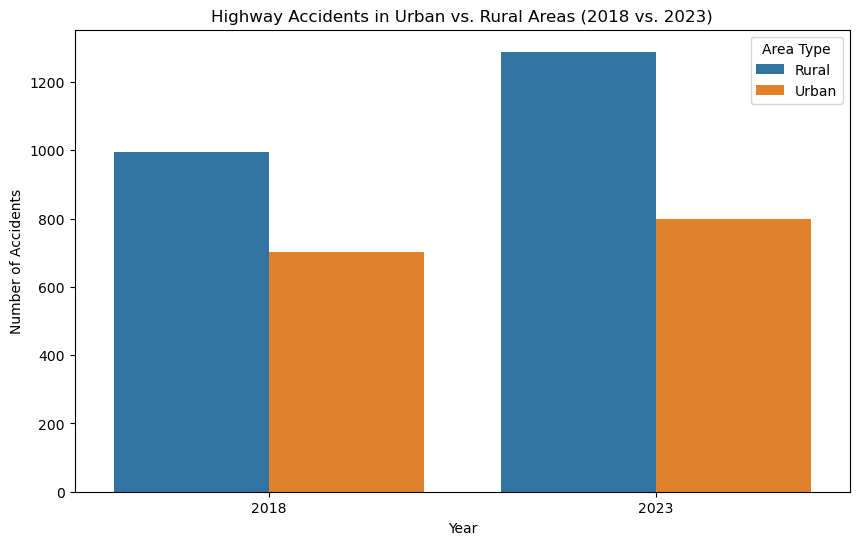

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='JAAR_VKL', hue='AREA_TYPE') #year on the x axis, hue means showing two types next to each other
plt.title('Highway Accidents in Urban vs. Rural Areas (2018 vs. 2023)')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.legend(title='Area Type')
plt.show()